## Занятие 3
## Математический анализ
## Решение нелинейных уравнений в Sympy. Solve и solveset.
https://docs.sympy.org/latest/modules/solvers/solveset.html

In [2]:
# Применим такой способ импорта библиотеки:
from sympy import Symbol, symbols, S, solve, solveset, Intersection, Interval, EmptySet, Union, plot 
# А для того, чтобы использовать все остальное, сделаем так:
import sympy
# Продолжим использовать магию
%matplotlib inline

Для решения нелинейных уравнений вида 
$$
f(x) = 0
$$
можно использовать метод  solve, которому передается выражение $f(x)$ и переменная, относительно которой нужно решать уравнение. Возвращает solve список list корней уравнения, он может быть пустым или конечным.
### Пример 1
Решим уравнение $x^2 - 1 = 0$ с помощью solve. Поскольку в левой части уравнения только одна переменная, ее можно явно не указывать.

In [3]:
x = Symbol('x')
solve(x**2 - 1)

[-1, 1]

Очевидно, решения уравнений $x^2 - 1 = 0$ и $y^2 - 1 = 0$ должны быть одинаковыми. Проверим:

In [4]:
y = Symbol('y')
res1 = solve(x**2 - 1)
res2 = solve(y**2 - 1)
res1 == res2

True

### Пример 2.
Уравнение, не имеющее вещественного решения $x^2 + 1 = 0$, решается solve по умолчанию в комплексных числах 

In [5]:
solve(x**2 + 1)

[-I, I]

Для решения уравнения в вещественных числах можно использовать solveset с необязательным параметром  domain=S.Reals. 

Укажем, что решение ищется только в вещественных числах:

In [6]:
solveset(x**2 + 1, domain=S.Reals)

EmptySet

Solveset возвращает  множество set корней уравнения, оно может быть пустым, конечным или даже бесконечным.
### Пример 3.
Уравнение, имеющее бесконечно много решений $\sin(x)=0$. 

In [7]:
solveset(sympy.sin(x))

Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

Сравним результат с solve

In [8]:
solve(sympy.sin(x))

[0, pi]

solve находит только корни на интервале $[0, 2\pi)$.

Если нужно отобрать корни уравнения на некотором интервале, то это можно сделать с помощью solveset,  Intersection и Interval.

### Пример 4.
Найдем решения уравнения $\sin^2(x) = \frac{1}{2}$ на отрезке $[-\pi, \pi]$. Для того, чтобы обращаться с $\frac{1}{2}$ без округлений, превратим эту дробь в символ с помощью метода S. Достаточно превратить в символ числитель дроби S(1), чтобы действия с ней выполнялись аналитически.

In [22]:
Intersection(solveset(sympy.sin(x)**2 - S(1)/2), Interval(-sympy.pi, sympy.pi))

{-I*(log(sqrt(sin(atan(2*sqrt(2))/2)**2 + cos(atan(2*sqrt(2))/2)**2)) + I*(-pi + atan(sin(atan(2*sqrt(2))/2)/cos(atan(2*sqrt(2))/2)))), -I*(log(sqrt(sin(atan(2*sqrt(2))/2)**2 + cos(atan(2*sqrt(2))/2)**2)) + I*(pi - atan(sin(atan(2*sqrt(2))/2)/cos(atan(2*sqrt(2))/2)))), -I*(log(sqrt(sin(atan(2*sqrt(2))/2)**2 + cos(atan(2*sqrt(2))/2)**2)) - I*atan(sin(atan(2*sqrt(2))/2)/cos(atan(2*sqrt(2))/2))), -I*(log(sqrt(sin(atan(2*sqrt(2))/2)**2 + cos(atan(2*sqrt(2))/2)**2)) + I*atan(sin(atan(2*sqrt(2))/2)/cos(atan(2*sqrt(2))/2)))}

### Пример 5.
Найдем решения уравнения $\sin^2(x) = \frac{1}{2}$ на открытом интервале $(-3\pi/4, 3\pi/4)$.

In [10]:
Intersection(solveset(sympy.sin(x)**2 - S(1)/2), Interval.open(-3*sympy.pi/4, 3*sympy.pi/4))

{-pi/4, pi/4}

Сравним с тем, что получится, если не указать, что интервал открытый:

In [11]:
Intersection(solveset(sympy.sin(x)**2 - S(1)/2), Interval(-3*sympy.pi/4, 3*sympy.pi/4))

{-3*pi/4, -pi/4, pi/4, 3*pi/4}

### Пример 6.
Можно найти пересечение множеств решений разных уравнений.

Найдем пересечение решений уравнений $\sin(x) = \frac{\sqrt2}{2}$ и $\cos(x) = \frac{\sqrt2}{2}$. 

In [12]:
res1 = solveset(sympy.sin(x) - sympy.sqrt(2)/2)
res2 = solveset(sympy.cos(x) - sympy.sqrt(2)/2)
Intersection(res1, res2)

ImageSet(Lambda(_n, 2*_n*pi + pi/4), Integers)

### Пример 7.
Пользуясь solveset()  решим аналитически уравнение
$$
4\sin^2(x^2 + 2x - 1) - 3 = 0, 
$$
при условии $x^2 + 2x - 1$ от 0 до $2\pi$.

Попытка решить уравнение сразу к успеху не приводит:

In [13]:
solveset(4*sympy.sin(x**2 + 2*x - 1)**2 - 3, domain=S.Reals)

ConditionSet(x, Eq(sin(x**2 + 2*x - 1)**2 - 3/4, 0), Reals)

Будем решать задачу последовательно.

Вначале решим уравнение $4y^2-3=0$

In [14]:
x, y, z = symbols('x y z')
sol1 = solveset(4*y**2 - 3, domain=S.Reals)
display(*sol1)

-sqrt(3)/2

sqrt(3)/2

Отдельно для каждого корня решим уравнение $\sin z=a$, $a=\frac{-\sqrt 3}{2},\ \frac{\sqrt 3}{2}$.

In [15]:
sol2 = {solveset(sympy.sin(z) - s, domain=S.Reals) for s in sol1}
display(*sol2)

Union(ImageSet(Lambda(_n, 2*_n*pi + 4*pi/3), Integers), ImageSet(Lambda(_n, 2*_n*pi + 5*pi/3), Integers))

Union(ImageSet(Lambda(_n, 2*_n*pi + 2*pi/3), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/3), Integers))

Объединим решения в одно множество с помощью метода Union. В качестве аргумента передадим распакованное множество *sol2.

In [16]:
sol3 = Union(*sol2)
display(sol3)

Union(ImageSet(Lambda(_n, 2*_n*pi + 4*pi/3), Integers), ImageSet(Lambda(_n, 2*_n*pi + 5*pi/3), Integers), ImageSet(Lambda(_n, 2*_n*pi + 2*pi/3), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/3), Integers))

Выберем корни из интервала $[0,2\pi]$

In [17]:
sol4 = Intersection(sol3, Interval(0, 2*sympy.pi)) 
display(sol4)

{pi/3, 2*pi/3, 4*pi/3, 5*pi/3}

Для каждого элемента $item$ множества sol4 решим уравнение $x^2+2x-1-item=0$. 

В распакованном виде решения красиво изображаются с помощью display.

In [18]:
sol5 = {solveset(x**2 + 2*x - 1 - item, domain=S.Reals) for item in sol4}
display(*sol5)

{-1 + sqrt(6)*sqrt(3 + 2*pi)/3, -sqrt(6)*sqrt(3 + 2*pi)/3 - 1}

{-1 + sqrt(6)*sqrt(3 + pi)/3, -sqrt(6)*sqrt(3 + pi)/3 - 1}

{-1 + sqrt(3)*sqrt(pi + 6)/3, -sqrt(3)*sqrt(pi + 6)/3 - 1}

{-1 + sqrt(3)*sqrt(6 + 5*pi)/3, -sqrt(3)*sqrt(6 + 5*pi)/3 - 1}

Объединим полученные решения, получим ответ к задаче.

In [19]:
sol6 = Union(*sol5)
sol6

{-1 + sqrt(3)*sqrt(6 + 5*pi)/3, -1 + sqrt(3)*sqrt(pi + 6)/3, -1 + sqrt(6)*sqrt(3 + pi)/3, -1 + sqrt(6)*sqrt(3 + 2*pi)/3, -sqrt(3)*sqrt(6 + 5*pi)/3 - 1, -sqrt(3)*sqrt(pi + 6)/3 - 1, -sqrt(6)*sqrt(3 + pi)/3 - 1, -sqrt(6)*sqrt(3 + 2*pi)/3 - 1}

### Пример 8.
Найти точки пересечения графиков функций $y = x^2$ и $y = 3x - 1$.
Построить графики так, чтобы на график попали обе точки пересечения. 

Вначале найдем решение уравнения $x^2 = 3x - 1$

In [20]:
res = solveset(x**2 - 3*x + 1)
res

{3/2 - sqrt(5)/2, sqrt(5)/2 + 3/2}

Построим графики функций на интервале, содержащем точки пересечения. Для красоты отступим на 1 влево и вправо от левой и правой точек пересечения.

Для того, чтобы вычислить пределы по горизонтальной оси, воспользуемся встроенными функциями min и max, с их помощью можно найти минимальный и максимальный корень уравнения.

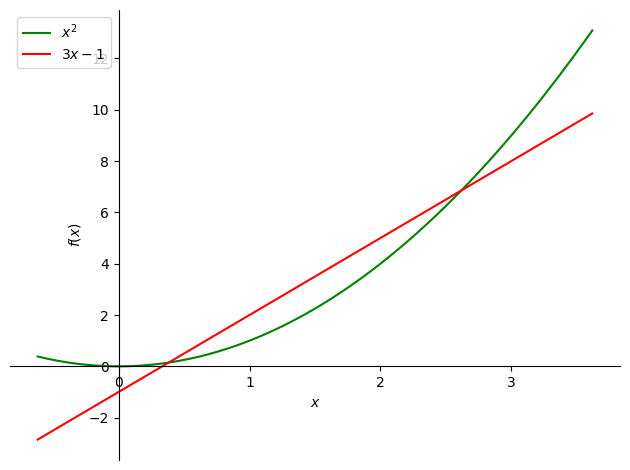

'p1'

3/2 - sqrt(5)/2

7/2 - 3*sqrt(5)/2

'p2'

sqrt(5)/2 + 3/2

3*sqrt(5)/2 + 7/2

In [21]:
x_limits = (x, min(res) - 1, max(res) + 1)
point1, point2 = [(x0, 3*x0 - 1) for x0 in res]
p = plot(x**2, x_limits, line_color='green', legend=True, label='$x^2$', show=False)
p.append(plot(3*x - 1, x_limits, line_color='red', legend=True, label='$3x - 1$', show=False)[0])
p.show()
display('p1', *point1, 'p2', *point2)